'''
Use PCA to evaluate the axes of variation.
'''

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl

In [35]:
colorset = ['#763C87','#1FA2F4','#0569CE','#F48C36','#E54028']
greens = ['#37535e', '#3b748a', '#4095b5', '#52aec9', '#72bfc4', '#93d0bf']

mpl.rcParams.update({
'backend': 'MacOSX',
'text.usetex': 'false',
'font.family': 'Myriad Pro',
'font.size': 18, 
'figure.subplot.hspace': .4,
'figure.subplot.bottom': 0.125, 
'savefig.dpi': 600,
'savefig.format': 'pdf', 
'pdf.fonttype': 42,
'figure.edgecolor': (1, 1, 1, 0), 
'figure.facecolor': (1, 1, 1, 0), 
'figure.figsize': (15.0, 10.0),
'font.weight': 'bold',
'axes.labelweight': 'bold',
'axes.titlesize': 36,
'lines.markersize': 11.200000000000001,
 'ytick.major.width': 1.6,
 'xtick.major.width': 1.6,
 'lines.markeredgewidth': 0.0,
 'xtick.major.pad': 11.200000000000001,
 'ytick.minor.width': 0.8,
 'grid.linewidth': 1.6,
 'lines.linewidth': 2.8000000000000003,
 'ytick.major.pad': 11.200000000000001,
})

In [36]:
cols = 'Tcell-CD69neg-K99A10-22h-ES FPKM	Tcell-CD69neg-nopept-22h-ES FPKM	Tcell-CD69neg-PCC01-22h-ES FPKM	Tcell-CD69neg-PCC1-22h-ES FPKM	Tcell-CD69pos-K99A100-22h-ES FPKM	Tcell-CD69pos-K99A10-22h-ES FPKM	Tcell-CD69pos-PCC01-22h-ES FPKM	Tcell-CD69pos-PCC1-22h-ES FPKM'
cols = cols.split('\t')
cols

['Tcell-CD69neg-K99A10-22h-ES FPKM',
 'Tcell-CD69neg-nopept-22h-ES FPKM',
 'Tcell-CD69neg-PCC01-22h-ES FPKM',
 'Tcell-CD69neg-PCC1-22h-ES FPKM',
 'Tcell-CD69pos-K99A100-22h-ES FPKM',
 'Tcell-CD69pos-K99A10-22h-ES FPKM',
 'Tcell-CD69pos-PCC01-22h-ES FPKM',
 'Tcell-CD69pos-PCC1-22h-ES FPKM']

In [37]:
filename = '../data/sorted/rpkm.txt'
data = pd.io.parsers.read_csv(filename, 
                                    sep='\t', 
                                    header=0, index_col=0)
cols = [
'Tcell-CD69neg-nopept-22h-ES FPKM',
'Tcell-CD69neg-K99A10-22h-ES FPKM',
'Tcell-CD69neg-PCC01-22h-ES FPKM',
'Tcell-CD69neg-PCC1-22h-ES FPKM',
'Tcell-CD69pos-K99A10-22h-ES FPKM',
'Tcell-CD69pos-K99A100-22h-ES FPKM',
'Tcell-CD69pos-PCC01-22h-ES FPKM',
'Tcell-CD69pos-PCC1-22h-ES FPKM']
print(data.shape)
labels = ['CD69- No Peptide',
          'CD69- 10uM K99A', 
          'CD69- 0.1uM PCC', 
          'CD69- 1uM PCC',
          'CD69+ 10uM K99A', 
          'CD69+ 100uM K99A', 
          'CD69+ 0.1uM PCC', 
          'CD69+ 1uM PCC']
neg_cols, neg_labels = cols[:3], labels[:3]
pos_cols, pos_labels = cols[4:], labels[4:]
datasets = []
for col_set in (pos_cols, neg_cols):
    datasets.append(data[col_set])
datasets[0].head()

(24453, 15)


,Tcell-CD69pos-K99A10-22h-ES FPKM,Tcell-CD69pos-K99A100-22h-ES FPKM,Tcell-CD69pos-PCC01-22h-ES FPKM,Tcell-CD69pos-PCC1-22h-ES FPKM
Transcript/RepeatID (cmd=analyzeRepeats.pl rna mm10 -strand both -count exons -d Tcell-CD69neg-K99A10-22h-ES Tcell-CD69neg-nopept-22h-ES Tcell-CD69neg-PCC01-22h-ES Tcell-CD69neg-PCC1-22h-ES Tcell-CD69pos-K99A100-22h-ES Tcell-CD69pos-K99A10-22h-ES Tcell-CD69pos-PCC01-22h-ES Tcell-CD69pos-PCC1-22h-ES -rpkm -condenseGenes),,,,
NM_001038996,0.000,0.000,0.000,0.000
NM_001013751,0.000,0.000,0.000,0.049
NM_009838,0.168,52.881,117.648,146.131
NM_001252516,0.000,0.000,0.000,0.000
NM_172779,0.000,0.973,2.995,2.934


In [33]:
filteredsets = []
for subdata in datasets:
    # Filter out genes that aren't changing.
    def check_changing(row):
        if row.max() - row.min() < row.min():
            return False
        if row.max() < 10:
            return False
        return True
    filtered = subdata[subdata.apply(check_changing, axis=1)]
    print(filtered.shape)
    filteredsets.append(filtered)

(6750, 4)
(5800, 3)


In [45]:
components = []
models = []
for filtered in filteredsets:
    n = 5
    transpose = filtered.transpose()
    pca = PCA(n_components=n)
    X_r = pca.fit(transpose).transform(transpose)
    print('Explained variance ratio (first {} components): '.format(n)
          + str(pca.explained_variance_ratio_))
    print(X_r)
    components.append(X_r)
    models.append(pca)

Explained variance ratio (first 5 components): [  7.83537949e-01   1.89563399e-01   2.68986523e-02   1.59102002e-30]
[[ -5.35620829e+03   1.02693754e+03   4.50452376e+01  -1.31676892e-11]
 [ -7.81370021e+01  -2.76735068e+03   2.22851869e+02   3.47044615e-12]
 [  2.13333760e+03   3.94681940e+02  -9.78885277e+02   7.41628980e-12]
 [  3.30100769e+03   1.34573120e+03   7.10988171e+02   2.46247467e-12]]
Explained variance ratio (first 5 components): [  9.65158545e-01   3.48414545e-02   1.01233484e-30]
[[ -1.04477630e+04   5.15331231e+01   8.66151595e-12]
 [  4.98898948e+03  -1.74487295e+03   6.47482068e-12]
 [  5.45877355e+03   1.69333983e+03  -1.50155444e-11]]


/Applications/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


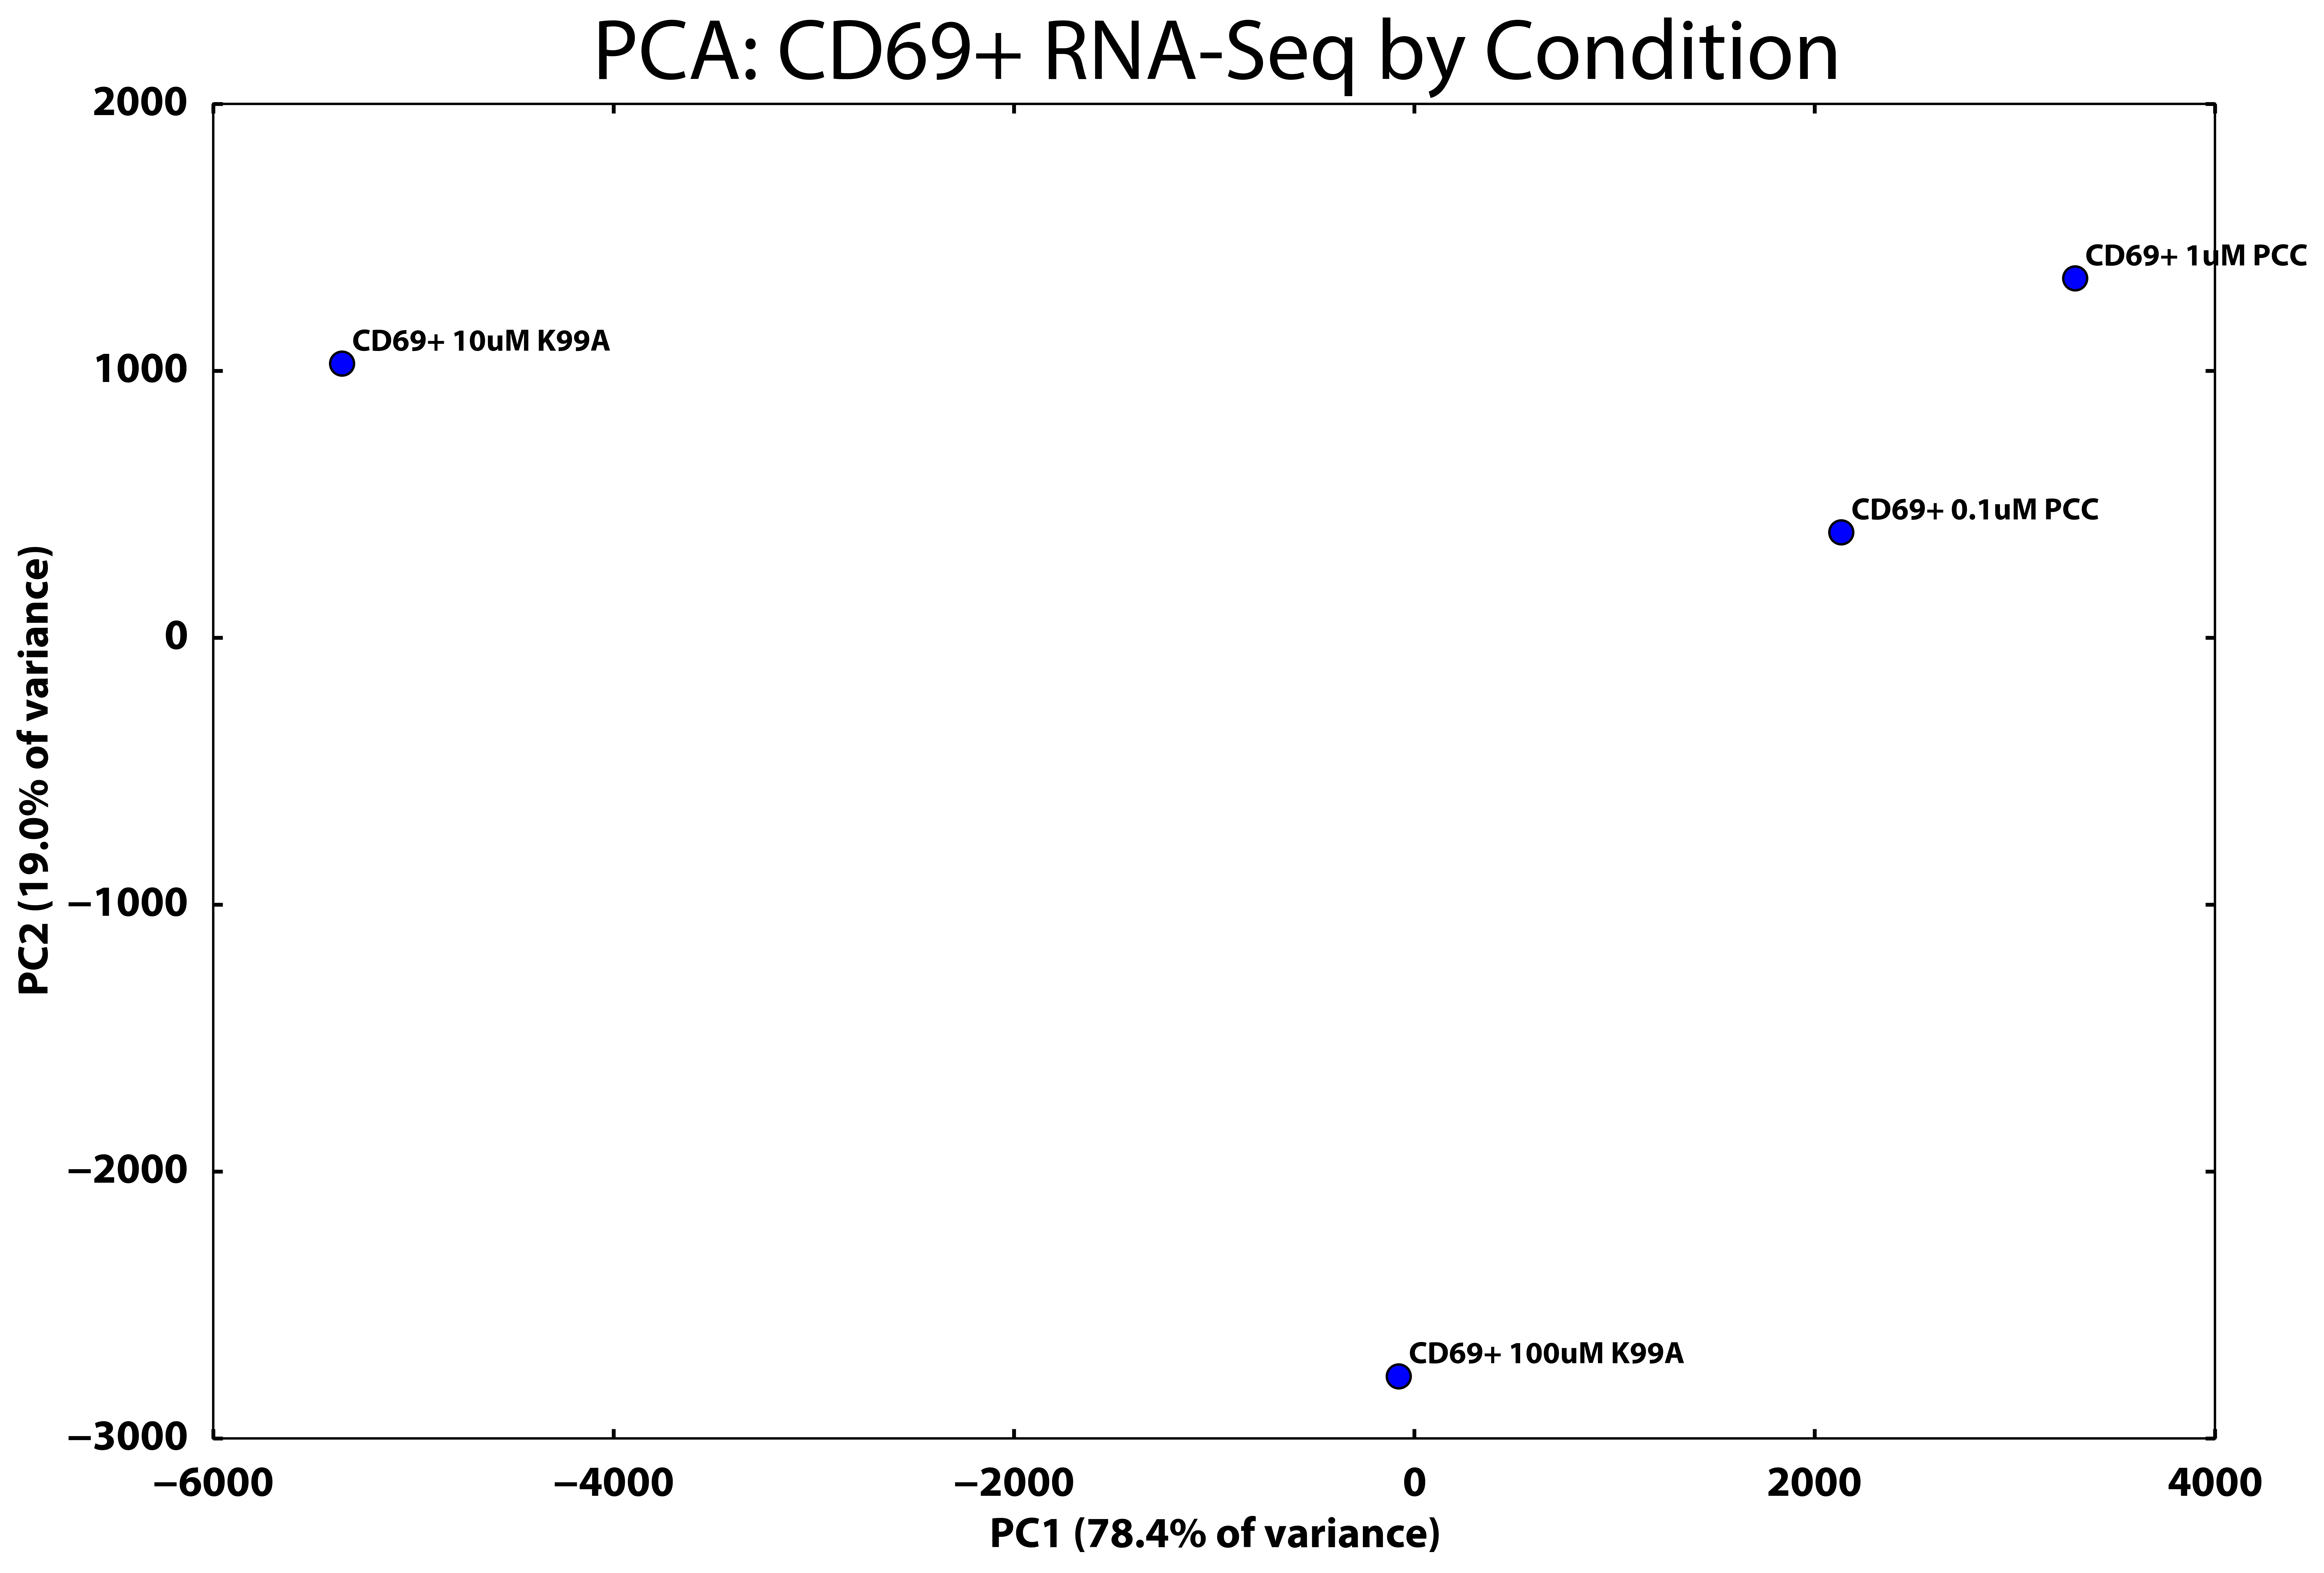

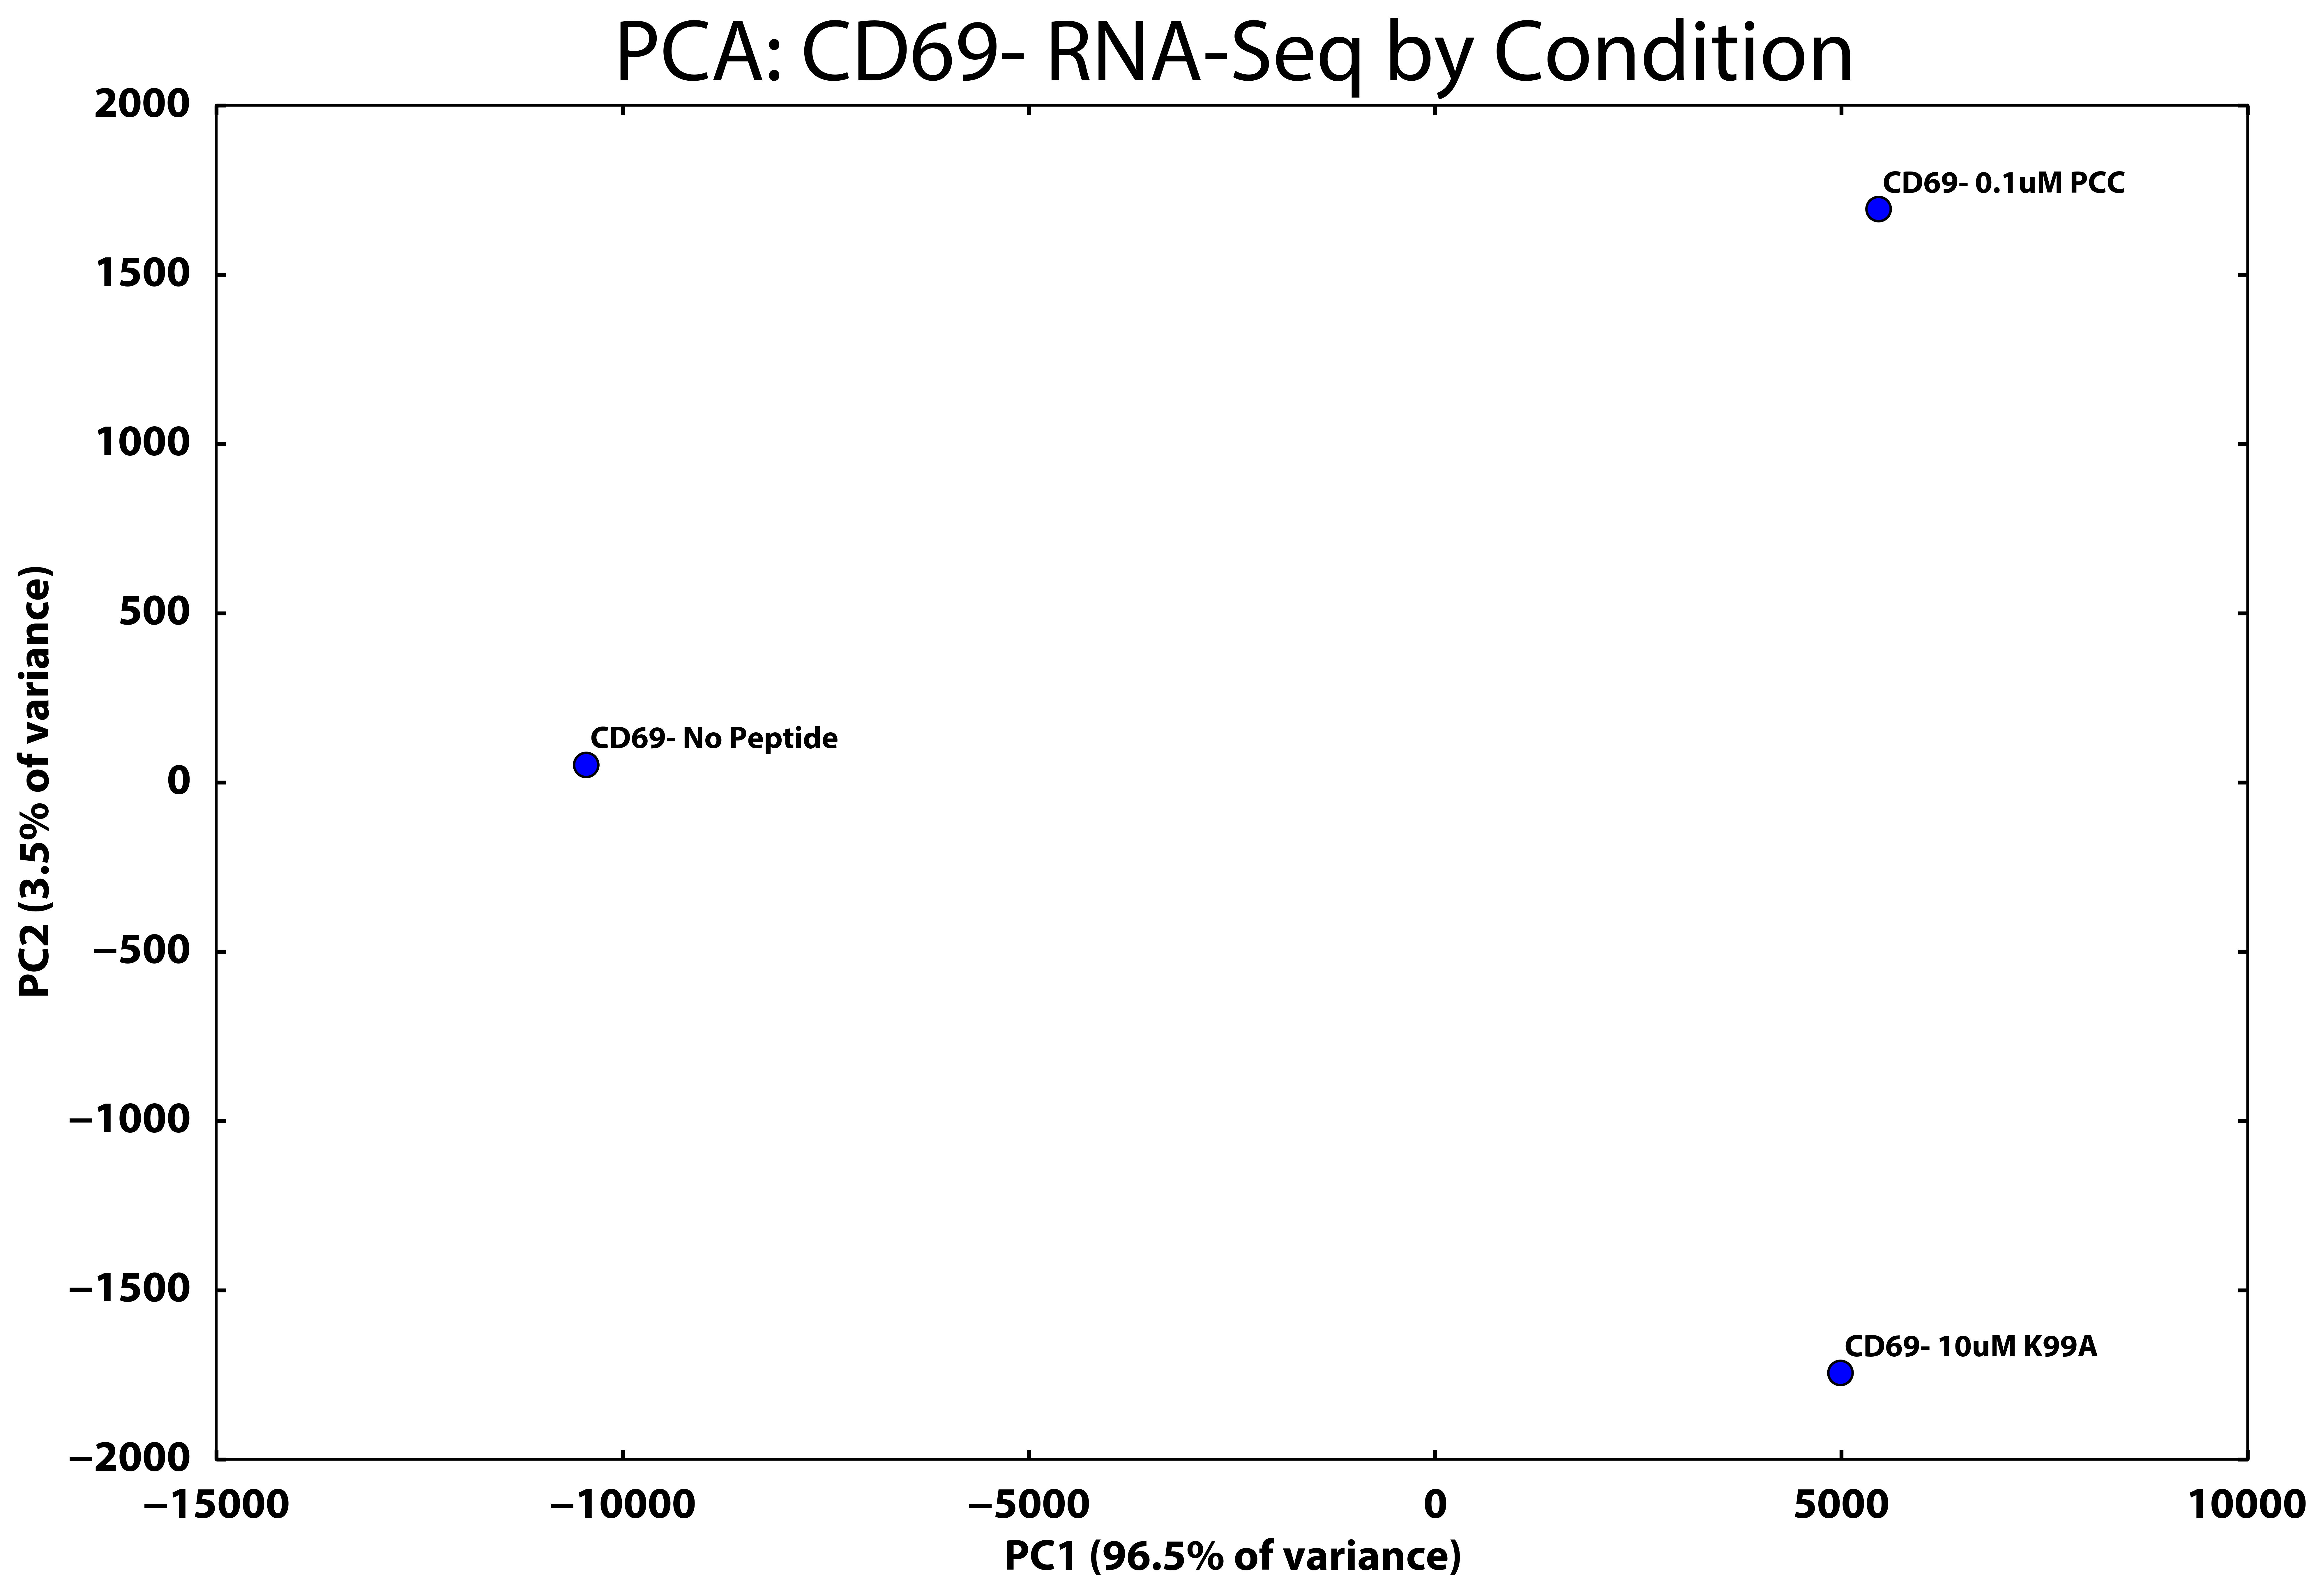

In [43]:
X_r = components[0]
plt.figure(figsize=[15, 10])
plt.scatter(X_r[:, 0].tolist(), X_r[:, 1].tolist(), s=100)
plt.title('PCA: CD69+ RNA-Seq by Condition', y=1.01)
plt.xlabel('PC1 (78.4% of variance)')
plt.ylabel('PC2 (19.0% of variance)')

margin = 50
for i, txt in enumerate(pos_labels):
    if i % 2: dir = -1
    plt.annotate(txt, (X_r[i,0] + margin,X_r[i,1] + margin),
                 size=13)

plt.savefig('figures/Sorted_PCA_RNA-Seq_by_Condition_CD69pos',
            bbox_inches='tight')

X_r = components[1]
plt.figure(figsize=[15, 10])
plt.scatter(X_r[:, 0].tolist(), X_r[:, 1].tolist(), s=100)
plt.title('PCA: CD69- RNA-Seq by Condition', y=1.01)
plt.xlabel('PC1 (96.5% of variance)')
plt.ylabel('PC2 (3.5% of variance)')

margin = 50
for i, txt in enumerate(neg_labels):
    if i % 2: dir = -1
    plt.annotate(txt, (X_r[i,0] + margin,X_r[i,1] + margin),
                 size=13)

plt.savefig('figures/Sorted_PCA_RNA-Seq_by_Condition_CD69neg',
            bbox_inches='tight')

In [24]:
# We want to get the top and bottom features that make up each component.
out_data = datasets[0][:]
out_data['gene_name'] = [s.split('|')[0] for s in data['Annotation/Divergence']]

components = pd.DataFrame(pcas[0].components_)
pcs = []

for x in range(0,2):
    pc = components.loc[x]
    pc.sort()
    ten_pct = len(pc)/10
    bottom = pc.index[:int(round(ten_pct))]
    top = pc.index[int(round(9*ten_pct)):]
    
    bottom_ids = filtered.index[bottom]
    top_ids = filtered.index[top]
    out_data.loc[bottom_ids].to_csv('output/clusters/pca_pc{}_bottom_rna_and.txt'.format(x + 1), 
                        sep='\t', header=True, index=True)
    out_data.loc[top_ids].to_csv('output/clusters/pca_pc{}_top_rna_and.txt'.format(x + 1), 
                        sep='\t', header=True, index=True)
    pcs.append([filtered.loc[bottom_ids], filtered.loc[top_ids]])

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
# Output all, sorted, with the PC index.
pc_data = out_data.loc[filtered.index]
pc_data['pc1'] = components.loc[0].tolist()
pc_data['pc2'] = components.loc[1].tolist()
pc_data.to_csv('output/clusters/pca_genes_rna_and.txt', 
                        sep='\t', header=True, index=True)

In [ ]:
for i, pc in enumerate(pcs):
    for j, segment in enumerate(pc):
        label = 'bottom'
        if j%2: label = 'top'
        normed = segment.divide(segment.max(axis=1), axis=0)
        fig = plt.figure(figsize=[15, 10])
        ax = fig.add_subplot(1,1,1)
    
        blues = ['#dae8f5', '#bad6ea', '#88bedc', '#539dcc', '#2a7ab9', '#0b559f']
        normed.T.plot(legend=False, linewidth=.5, 
                      ax=ax, color=blues)
        
        normed.mean().plot(legend=True, linewidth=3, 
                        ax=ax, color='#344a5a',
                        label='Mean')
        ax.grid(False)
        plt.xticks(range(0, len(pos_labels)), pos_labels)
        plt.ylabel('Normalized RPKM')
        title = 'CD69+ gene expression in the {} 10% of PC{}'.format(label, i+1)
        plt.title(title, y=1.01)
        plt.savefig('figures/' + title.replace(' ', '_'),
            bbox_inches='tight')

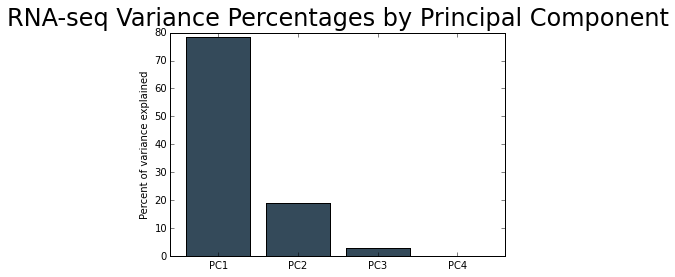

In [28]:
# Plot percent variance explained by the first four PCs
num = 4
span = range(0,num)
ratios = pca.explained_variance_ratio_[:num]*100
plt.figure()

plt.bar([x + .2 for x in span], ratios, color='#344a5a')
plt.xlim([0, num + .2])
plt.ylabel('Percent of variance explained')
plt.xticks([x + .6 for x in span], ['PC{}'.format(x + 1) for x in span])
title = 'RNA-seq Variance Percentages by Principal Component'
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')

In [11]:
len(bottom)

305